# HW due Feb 17

In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Here is a usefull list of all the functions we have been using:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import Ridge

In [4]:
from sklearn.linear_model import Lasso

In [5]:
from sklearn.linear_model import ElasticNet

### Now that we have learned so much more about machine learning and regression. Let's take another look at the Life Expectancy data and see if we can do a better job building the model.

In [6]:
# Import the data
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/LifeExpectancyData.csv'
df = pd.read_csv(URL)
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   Infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria   HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0       0.1  584.259210  33736494.0   
1   58.0               8.18         62.0       0.1  612.696514    327582.0   
2   62.0               8.13         64.0       0.1  631.744976  31731688.0   
3   67.0               8.52         67.0       0.1  669.959000   3696958.0   
4   68.0               7.87         68.0       0.1   63.537231   2978599.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   
2                  17.7                17.7                            0.470   
3                  17.9                18.0                            0.463   
4                  18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5  

[5 rows x 22 columns]

### Things you should do
- Use seaborn to plot the data again and choose your features, except now you could consider features that have more of a polynomial shape if you want. Get to know the data!
- For the features that you choose, clean up the data: remove false zeros, remove NA's, and if possible remove outliers.
- Choose a model: Linear, Polynomial, Regularized, etc
- Separate your data into training and validation sets
- Train your model finding thetas and normalization parameters from the training set.
- Test your model using the validation data set. This might include plotting learning curves and comparing the error (training vs validation) of different model assumptions. At this point you might have to go back and make some different choices.


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


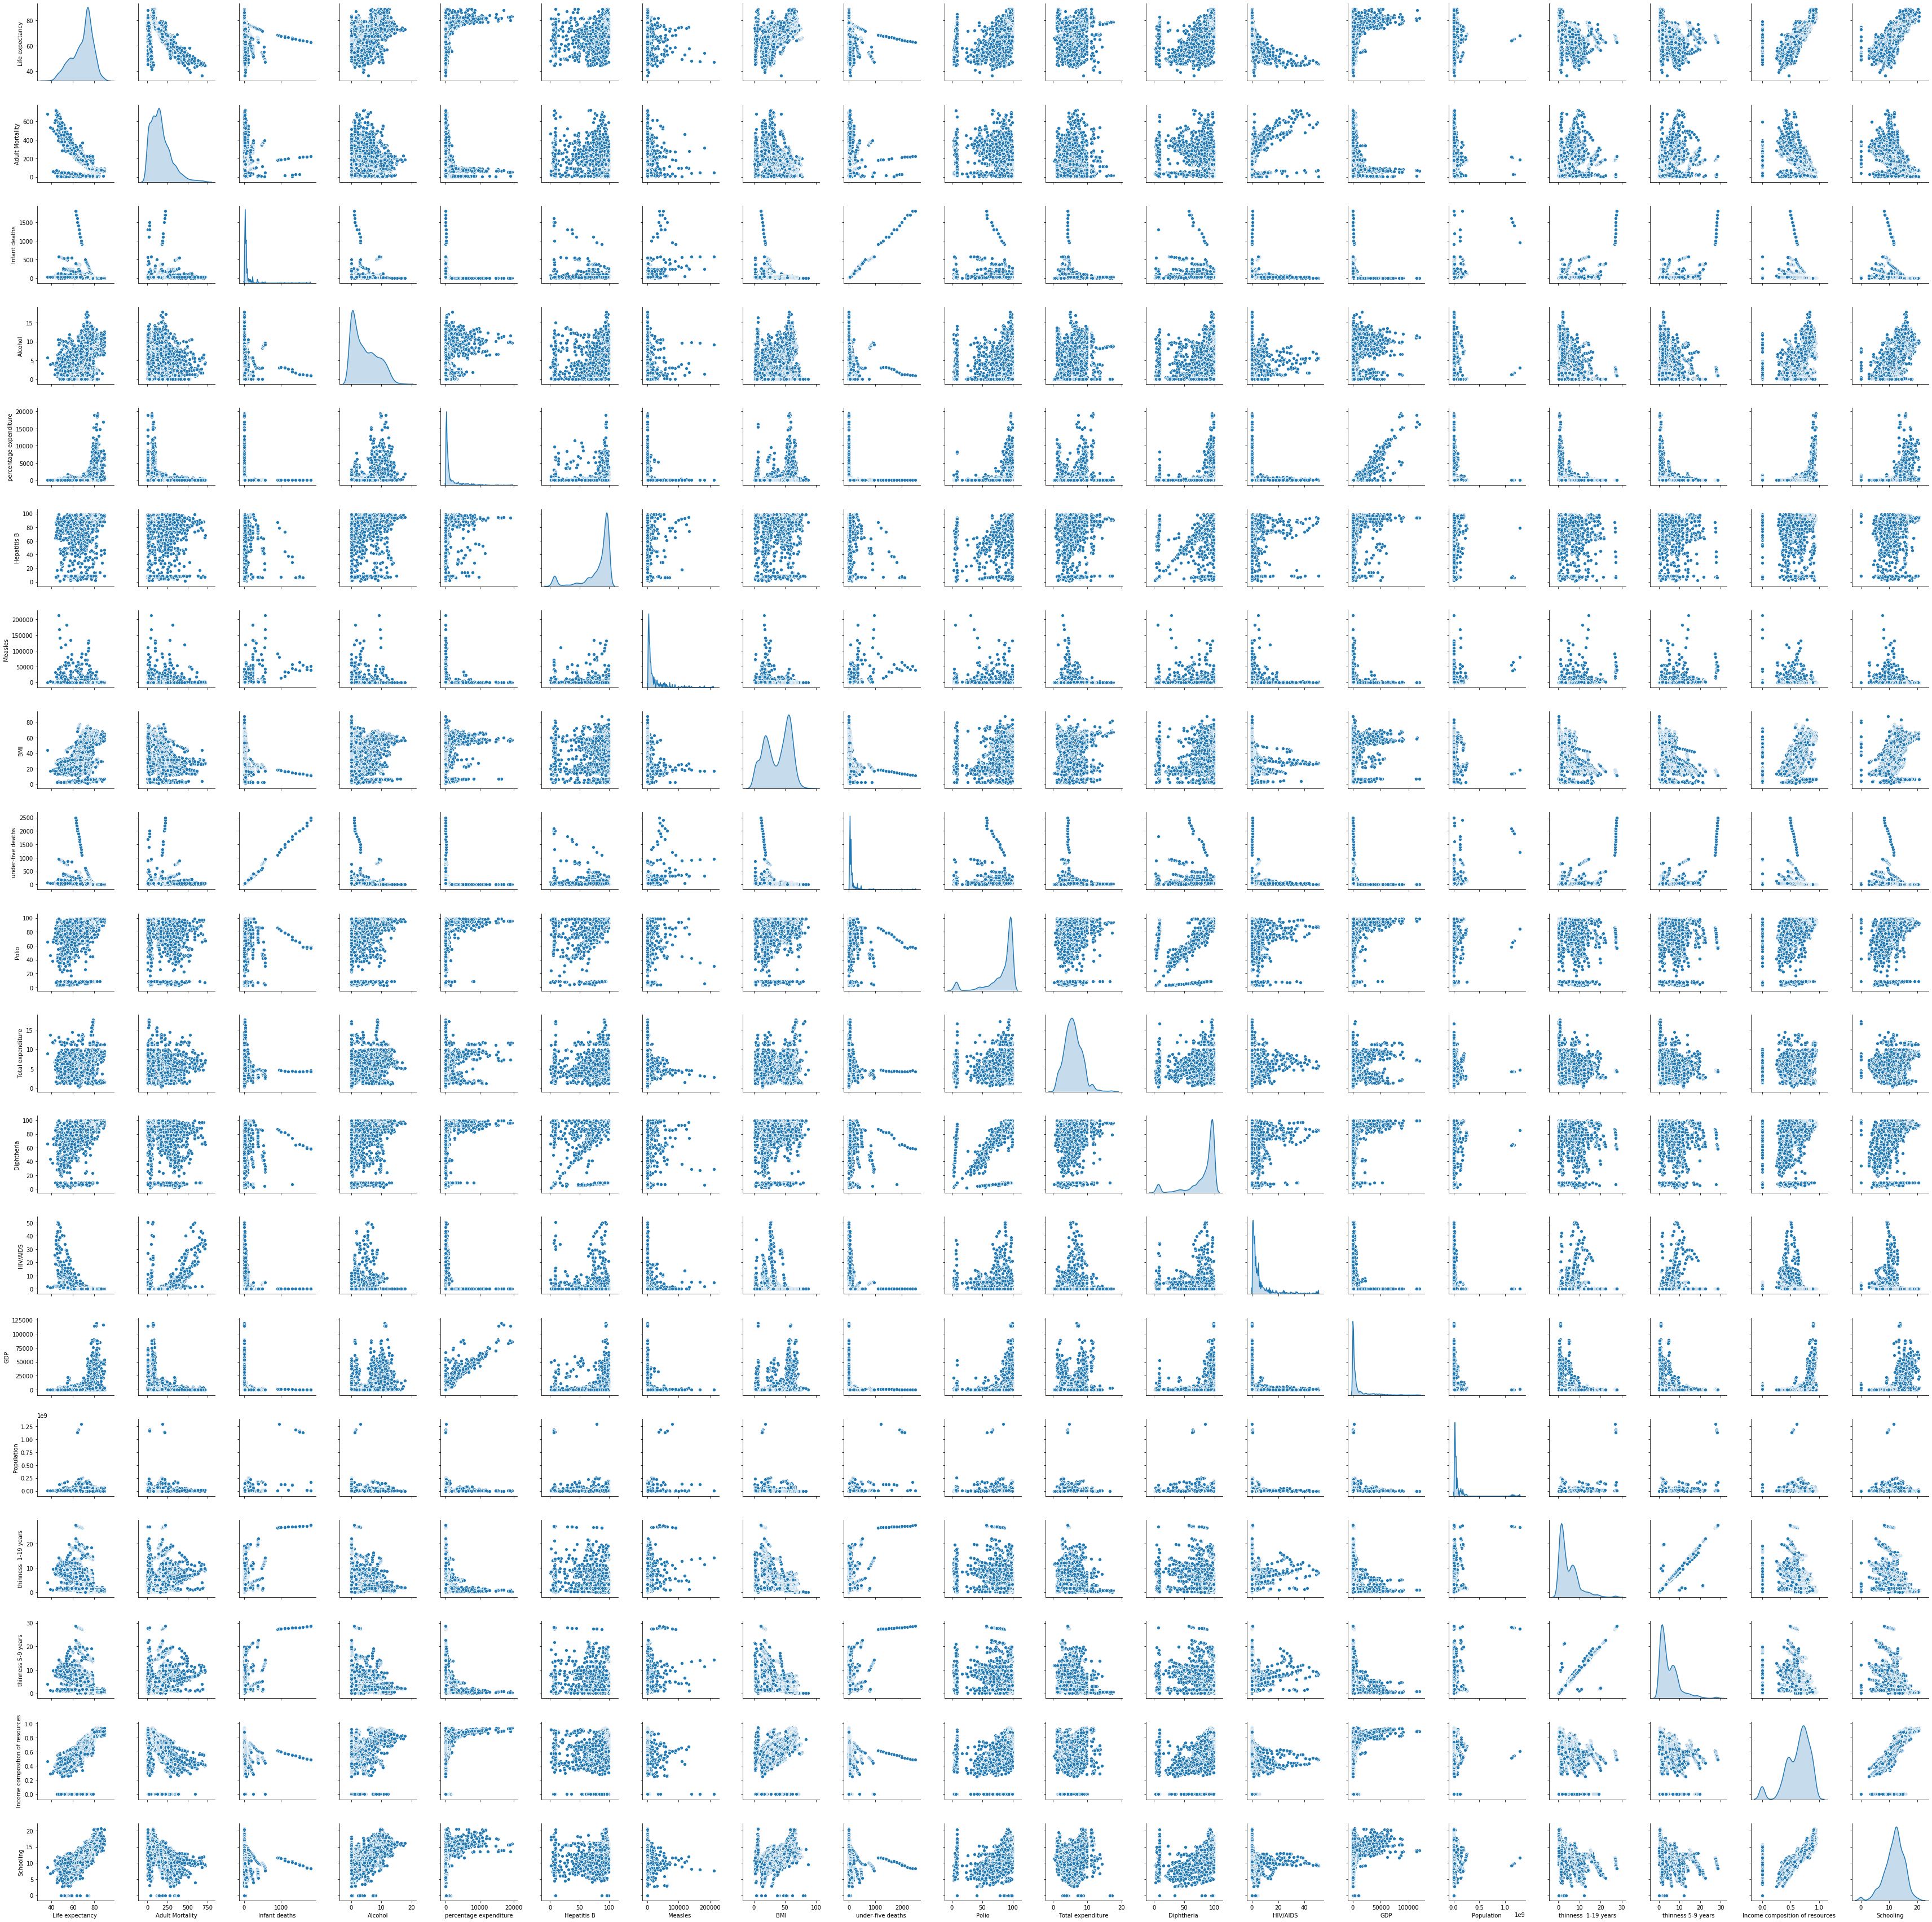

In [8]:
#Remove the columns that don't really help our data: country, year,status
df.drop('Country', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

# Plot all of the variable-to-variable relations as scatterplots - this should just run
sns.pairplot(df,diag_kind="kde")

In [9]:
#Upon examination, variables that share a polynomial shape with life expectancy include:
#percentage expenditure, BMI, HIV/AIDS, GDP, Schooling

#After testing polynomial regression I found BMI causes a higher mean squared error for both linear and polynomial regression
#Therefore, I dropped BMI and the mean squared error got lower. However, I don't want to remove anymore as the remaining 4 
#Features share a polynomial relationship (for the most part) to life expectancy

#Remove all n/a
df.dropna(inplace=True)

#Set life expectancy as dependent variable
y = df['Life expectancy ']

#Set up the important features on life expectancy and make them columns
Expenditure = df[['percentage expenditure']].to_numpy().reshape(-1,1)
#BMI = df[['BMI']].to_numpy().reshape(-1,1)
HIV = df[['HIV/AIDS']].to_numpy().reshape(-1,1)
GDP = df[['GDP']].to_numpy().reshape(-1,1)
Schooling = df[['Schooling']].to_numpy().reshape(-1,1)

#Mash the important figures together
x = np.hstack((Expenditure, HIV, GDP, Schooling))
print(x.shape, Expenditure.shape, HIV.shape, GDP.shape, Schooling.shape)
print(y.shape)

(1649, 4) (1649, 1) (1649, 1) (1649, 1) (1649, 1)
(1649,)


In [ ]:
#Split up for testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Lets Experiment with a linear regression

In [11]:
#Declare my standard scaler and linear regression functions
SS = StandardScaler()
lm = LinearRegression()

# Define the regression using the pipeline
linR = Pipeline([
            ("scale", SS),
            ("lin_reg", lm),
        ])

#Apply our regression model/pipelie to our training data
linR.fit(x_train, y_train)
lm.intercept_

69.23055344958306

In [25]:
#Just to check it out, lets first start with linear

thetas = [lm.intercept_, lm.coef_[0], lm.coef_[1], lm.coef_[2], lm.coef_[3]] 
print(thetas)

[69.23055344958311, -0.05512881637942524, -0.5823433942479003, 23.303748852503098, -5.299648272701975]


(100, 4) (100,)


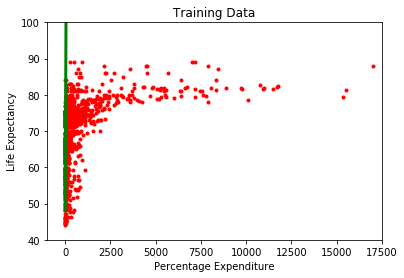

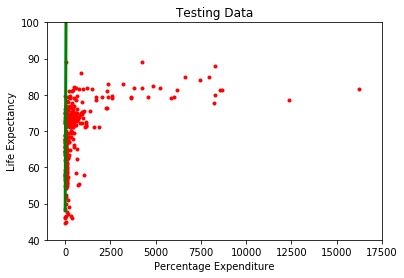

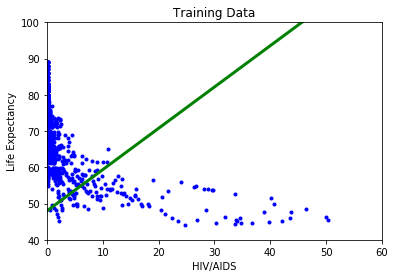

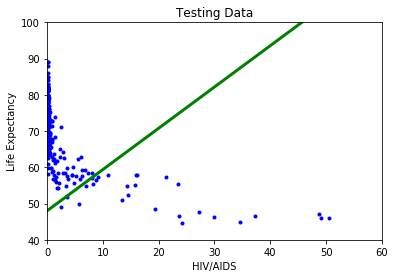

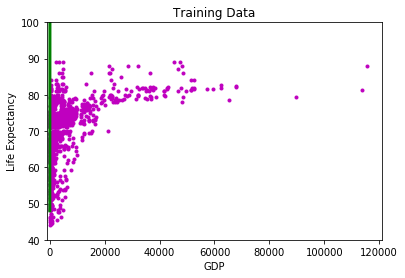

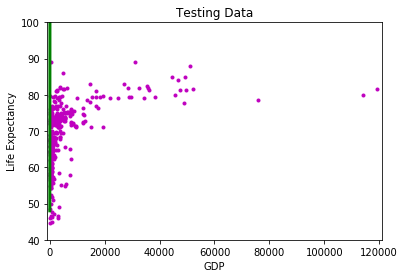

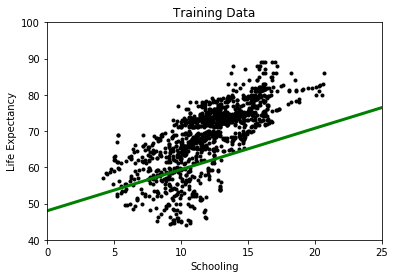

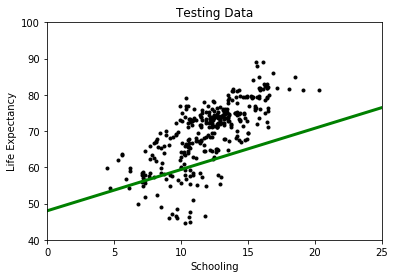

In [27]:
#Create 4 columns of values from 0 to 100
x0 = np.linspace(0,100,100).reshape(100,1)
x1 = np.linspace(0,100,100).reshape(100,1)
x2 = np.linspace(0,100,100).reshape(100,1)
x3 = np.linspace(0,100,100).reshape(100,1)

#Stack the 4 columns so we have 4 independent columns for predictions for each feature
x_new = np.hstack((x0,x1,x2,x3))

#Make a prediction on life expectancy based on the feature
y_predict = linR.predict(x_new)

print(x_new.shape, y_predict.shape)

#Plot training data and prediction line for Percentage Expenditure
plt.plot(x_train[:,0], y_train, 'r.')
plt.plot(x_new[:,0], y_predict, 'g-', linewidth = 3)
plt.axis([-1000,17500,40,100])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for Percentage Expenditure
plt.plot(x_test[:,0], y_test, 'r.')
plt.plot(x_new[:,0], y_predict, 'g-', linewidth = 3)
plt.axis([-1000,17500,40,100])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for HIV/AIDS
plt.plot(x_train[:,1], y_train, 'b.')
plt.plot(x_new[:,1], y_predict, 'g-', linewidth = 3)
plt.axis([0,60,40,100])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for HIV/AIDS
plt.plot(x_test[:,1], y_test, 'b.')
plt.plot(x_new[:,1], y_predict, 'g-', linewidth = 3)
plt.axis([0,60,40,100])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for GDP
plt.plot(x_train[:,2], y_train, 'm.')
plt.plot(x_new[:,2], y_predict, 'g-', linewidth = 3)
plt.axis([-1000,121000,40,100])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for GDP
plt.plot(x_test[:,2], y_test, 'm.')
plt.plot(x_new[:,2], y_predict, 'g-', linewidth = 3)
plt.axis([-1000,121000,40,100])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for Schooling
plt.plot(x_train[:,3], y_train, 'k.')
plt.plot(x_new[:,3], y_predict, 'g-', linewidth = 3)
plt.axis([0,25,40,100])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for GDP
plt.plot(x_test[:,3], y_test, 'k.')
plt.plot(x_new[:,3], y_predict, 'g-', linewidth = 3)
plt.axis([0,25,40,100])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()


In [39]:
#Measure mean squared error for both training and tetsing data
MSEPredTrain = linR.predict(x_train)
MSEPredTest = linR.predict(x_test)

m0 = mean_squared_error(y_train, MSEPredTrain)
n0 = mean_squared_error(y_test, MSEPredTest)

print('MSE for training data:',m0)
print('MSE for testing data:',n0)

MSE for training data: 19.98899763480746
MSE for testing data 19.641291107379917


Now Lets try a polynomial regression

In [15]:
#Split up for testing and training data
x_trainP, x_testP, y_trainP, y_testP = train_test_split(x, y, test_size=0.2, random_state=10)
print(x_trainP.shape, x_testP.shape, y_trainP.shape, y_testP.shape)

(1319, 4) (330, 4) (1319,) (330,)


In [34]:
#Define functions needed for pipeline
poly = PolynomialFeatures(degree=3, include_bias=False)
SS = StandardScaler()
lm = LinearRegression()

# Define the regression using the pipeline
polynomial_regression = Pipeline([
            ("poly_features", poly),
            ("scale", SS),
            ("lin_reg", lm),
        ])

#Apply poly. Regression to training data
polynomial_regression.fit(x_trainP, y_trainP)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

(100,)


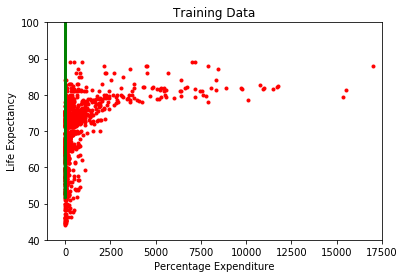

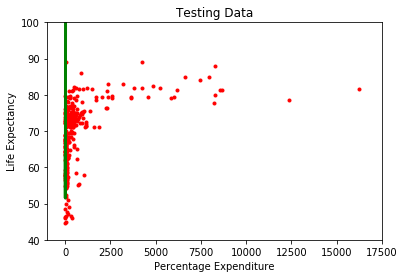

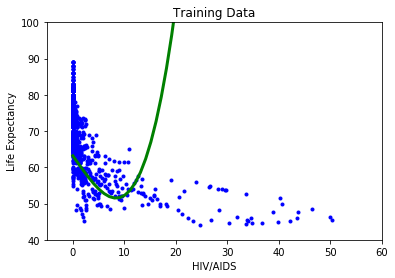

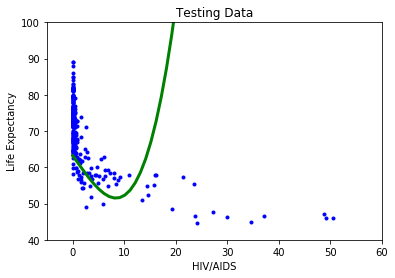

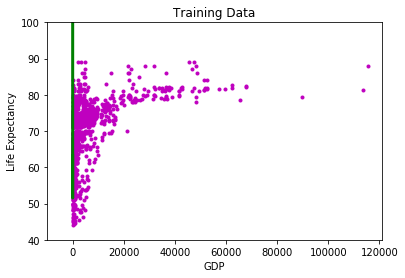

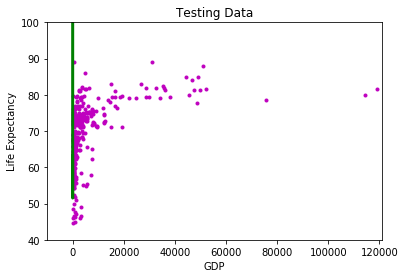

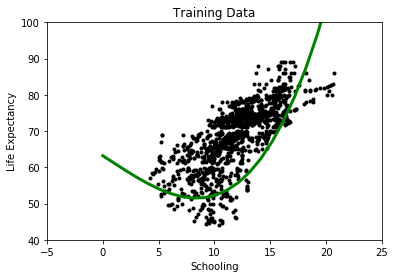

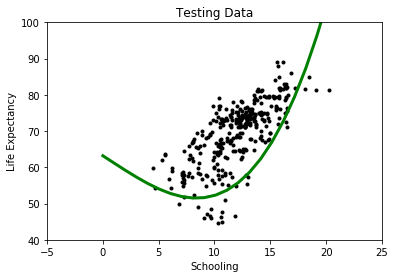

In [38]:
#Create 4 columns of values from 0 to 100
x0P = np.linspace(0,100,100).reshape(100,1)
x1P = np.linspace(0,100,100).reshape(100,1)
x2P = np.linspace(0,100,100).reshape(100,1)
x3P = np.linspace(0,100,100).reshape(100,1)

#Stack the 4 columns so we have 4 independent columns for predictions for each feature
x_newP = np.hstack((x0P,x1P,x2P,x3P))

#Make a prediction on life expectancy based on the feature
y_predictP = polynomial_regression.predict(x_newP)

print(y_predictP.shape)

#Plot training data and prediction line for Percentage Expenditure
plt.plot(x_trainP[:,0], y_trainP, 'r.')
plt.plot(x_newP[:,0], y_predictP, 'g-', linewidth = 3)
plt.axis([-1000,17500,40,100])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for Percentage Expenditure
plt.plot(x_testP[:,0], y_testP, 'r.')
plt.plot(x_newP[:,0], y_predictP, 'g-', linewidth = 3)
plt.axis([-1000,17500,40,100])
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for HIV/AIDS
plt.plot(x_trainP[:,1], y_trainP, 'b.')
plt.plot(x_newP[:,1], y_predictP, 'g-', linewidth = 3)
plt.axis([-5,60,40,100])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for HIV/AIDS
plt.plot(x_testP[:,1], y_testP, 'b.')
plt.plot(x_newP[:,1], y_predictP, 'g-', linewidth = 3)
plt.axis([-5,60,40,100])
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for GDP
plt.plot(x_trainP[:,2], y_trainP, 'm.')
plt.plot(x_newP[:,2], y_predictP, 'g-', linewidth = 3)
plt.axis([-10000,121000,40,100])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for GDP
plt.plot(x_testP[:,2], y_testP, 'm.')
plt.plot(x_newP[:,2], y_predictP, 'g-', linewidth = 3)
plt.axis([-10000,121000,40,100])
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

#Plot training data and prediction line for Schooling
plt.plot(x_trainP[:,3], y_trainP, 'k.')
plt.plot(x_newP[:,3], y_predictP, 'g-', linewidth = 3)
plt.axis([-5,25,40,100])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Training Data')
plt.show()

#Plot testing data and prediction line for Schooling
plt.plot(x_testP[:,3], y_testP, 'k.')
plt.plot(x_newP[:,3], y_predictP, 'g-', linewidth = 3)
plt.axis([-5,25,40,100])
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Testing Data')
plt.show()

In [40]:
#Calculate mean squared error for both training and testing data
MSEPredTrainP = polynomial_regression.predict(x_trainP)
MSEPredTestP = polynomial_regression.predict(x_testP)

mP = mean_squared_error(y_train, MSEPredTrainP)
nP = mean_squared_error(y_test, MSEPredTestP)

print('MSE for training data:',mP)
print('MSE for testing data:',nP)

MSE for training data: 13.638669166211457
MSE for testing data: 12.951224108761119


# IMPORTANT 
### For each step of this process you should BOTH comment your code expain what it is doing and add markdown cells in between code with your words in clear english saying why you are making the decisions you are making.

Make sure to rationalize ALL of the decisions you are making. A fellow student in our class should be able to open your jupyter notebook and understand all of your code, steps, and decisions without needing to ask you any questions.

- Please compare your results this time to what you did last time. How did you change your model? How did your results change?

From the last time we made predictions on life expectancy, I only chose 3 features I thought looked linear, which were adult mortality, income composition of resources, and schooling. This time around, I looked for more of a polynomial shape, which gave a bit more room for more features to test as it is easier to form a polynomial among a lot of data that a linear equation. Therefore, this time around, I started with 5 features, but eventually went down to two as BMI was increasing my mean squared error, which I don't want. However, 4>3, so my previous comment still stands. Unlike before, I went deeper into the relationship of my prediction to the data. Before, I just took what looked important and applied normalization and then linear regression to eventually find thetas, and make a prediction. Thats it. This time, I created a pipeline to make regression easier, I split up the data into training data and validation data to test out the algorithm created from the training data. Then I plotted my prediction line with my training and testing data (which I didn't do before) and take a closer look to see how it fits among the data we are trying to predict. Finally, I didn't know exactly how to get the mean squared error last time, so I calculated this time and kept altering the degree of the polynomial, along with the features affect on life expectancy till it got closer to 0, since that is the goal for any prediction model.